# Sepsis Prediction Analysis

### Business Understanding

Sepsis is a critical medical condition characterized by the body's extreme response to infection, often leading to severe tissue damage, multiple organ failure, and even death. Each year, approximately 30 million individuals worldwide develop sepsis, with a staggering one-fifth of them succumbing to the disease. Detecting sepsis early and initiating immediate treatment is crucial for saving lives and improving patient outcomes. This project aims to leverage machine learning to predict whether patients will develop sepsis using their physiological data.

Project Objectives:
The primary objectives of this project are as follows:
1. Early Sepsis Detection: Develop a robust machine learning model capable of accurately predicting whether patients will develop sepsis using their physiological data.
2. Life-Saving Potential: By accurately predicting whether patients will develop sepsis, this project aims to enable healthcare professionals to intervene promptly, potentially saving lives and reducing the severity of complications associated with sepsis.
3. Model Integration: Implement the trained machine learning model into a user-friendly FastAPI-based application. This integration will make the model accessible to multiple healthcare professionals, streamlining the prediction process and facilitating early sepsis diagnosis.

Data Source:
The project relies on test and train datasets from a modified version of a publicly available patients data source. These train and test datasets are publicly available on Kaggle.

Data Preprocessing:
Data preprocessing will play a crucial role in this project. Preprocessing steps include feature scaling, and dataset  balancing, and data splitting to improve model performance.

Machine Learning Models:
Various machine learning algorithms, such as logistic regression, random forests, support vector machines, and neural networks, will be explored to determine the most effective model for sepsis prediction. Model selection will be based on factors like accuracy, sensitivity, specificity, and interpretability.

Model Evaluation:
The performance of the developed models will be rigorously evaluated using appropriate metrics, including but not limited to precision, recall, F1 score, and area under the receiver operating characteristic curve (AUC-ROC). Cross-validation techniques will help ensure the model's generalizability.

FastAPI Integration:
To make the sepsis prediction model accessible to healthcare professionals, it will be integrated into a FastAPI-based web application. This integration will provide a user-friendly interface where users can input patient data and receive predictions in real-time.

Project Impact:
Successful implementation of this project can have a profound impact on healthcare outcomes. Early sepsis detection can lead to faster intervention, reduced mortality rates, and improved patient recovery. Additionally, by making the model available through FastAPI, it becomes a valuable tool for healthcare providers worldwide, potentially saving countless lives.

Conclusion:
This Sepsis Prediction Project combines cutting-edge machine learning with user-friendly software integration to tackle a critical medical challenge. The goal is to provide healthcare professionals with a powerful tool for early sepsis detection, ultimately leading to better patient care and improved survival rates in the face of this life-threatening condition.

### Hypothesis

Null Hypothesis (H0):
The machine learning model's accuracy in predicting sepsis based on patients' physiological data is not significantly different from a baseline level, suggesting that the model's predictions are no better than random chance.

Alternative Hypothesis (H1):
The machine learning model's accuracy in predicting sepsis based on patients' physiological data is significantly better than a baseline level, indicating that the model provides valuable predictive capabilities beyond random chance.

In simpler terms:
H0: The machine learning model doesn't improve sepsis prediction beyond random chance.
H1: The machine learning model significantly improves sepsis prediction beyond random chance.

This hypothesis specifically addresses the improvement in sepsis prediction and aligns with the project's objective of determining whether the model's predictions are meaningful compared to random guessing.

### Analytical Questions

1. How many patients on the train dataset have developed sepsis?.
2. Which age group has more occurence of sepsis?
3. Does having a health insurance reduce the chances of patients developing sepsis?
4. Does Body Mass Index (BMI) have a direct correlation with sepsis development?
5. Does the blood parameters play a role in sepsis development?

### Exploratory Data Analysis

In [1]:
# Import the needed packages
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for testing the hypothesis
import scipy.stats as stats

# Library for pandas profiling
from pandas_profiling import ProfileReport

# Library for splitting the train data
from sklearn.model_selection import train_test_split

# Library for feature scaling
from sklearn.preprocessing import StandardScaler

# Library for feature encoding
from sklearn.preprocessing import OneHotEncoder

# Libraries for balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Library for working with operating system
import os

# Library to serialize a Python object into a flat byte stream and transform a byte stream back into a Python object
import pickle

# Library to handle warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\AppData\Local\Temp\ipykernel_10336\521867111.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Load the datasets.

train = pd.read_csv('data/Paitients_Files_Train.csv')
test = pd.read_csv('data/Paitients_Files_Test.csv')

In [3]:
# View the first five rows of the train dataset

train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# View the first five rows of the test dataset

test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


The train dataset has a 'Sepssis' column which is absent in the test dataset. This 'Sepssis' column will serve as the target column when training the model. This column will be renamed to 'Sepsis'.

In [5]:
# Rename 'Sepssis' column to 'Sepsis'

train.rename(columns={'Sepssis': 'Sepsis'}, inplace=True)
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
# Check the number of rows and columns on both datasets.

train.shape, test.shape

((599, 11), (169, 10))

The train dataset has 599 rows and 11 columns, while the test dataset has 169 rows and 10 columns.

In [7]:
# Check the datatypes and the presence of missing values on the train dataset.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
# Check the datatypes and the presence of missing values on the test dataset.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


There are no empty cells in both the train and test dataset. And the datatype of each column in both datasets are consistent with each other.

In [9]:
# Confirm that both train and test datasets have no missing values

train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [10]:
# Check for the presence of duplicates on the train and test datasets.

train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [28]:
# Investigating the columns on the train dataset.

train.columns
for column in train.columns:
    print('column: {} - unique value: {}'.format(column, train[column].unique()))

column: ID - unique value: ['ICU200010' 'ICU200011' 'ICU200012' 'ICU200013' 'ICU200014' 'ICU200015'
 'ICU200016' 'ICU200017' 'ICU200018' 'ICU200019' 'ICU200020' 'ICU200021'
 'ICU200022' 'ICU200023' 'ICU200024' 'ICU200025' 'ICU200026' 'ICU200027'
 'ICU200028' 'ICU200029' 'ICU200030' 'ICU200031' 'ICU200032' 'ICU200033'
 'ICU200034' 'ICU200035' 'ICU200036' 'ICU200037' 'ICU200038' 'ICU200039'
 'ICU200040' 'ICU200041' 'ICU200042' 'ICU200043' 'ICU200044' 'ICU200045'
 'ICU200046' 'ICU200047' 'ICU200048' 'ICU200049' 'ICU200050' 'ICU200051'
 'ICU200052' 'ICU200053' 'ICU200054' 'ICU200055' 'ICU200056' 'ICU200057'
 'ICU200058' 'ICU200059' 'ICU200060' 'ICU200061' 'ICU200062' 'ICU200063'
 'ICU200064' 'ICU200065' 'ICU200066' 'ICU200067' 'ICU200068' 'ICU200069'
 'ICU200070' 'ICU200071' 'ICU200072' 'ICU200073' 'ICU200074' 'ICU200075'
 'ICU200076' 'ICU200077' 'ICU200078' 'ICU200079' 'ICU200080' 'ICU200081'
 'ICU200082' 'ICU200083' 'ICU200084' 'ICU200085' 'ICU200086' 'ICU200087'
 'ICU200088' 'ICU200089'

In [11]:
# Obtain the numerical columns of the train dataset
train_num = train.select_dtypes(include=['float64', 'int64']).columns

# Obtain the numerical columns of the test dataset
test_num = test.select_dtypes(include=['float64', 'int64']).columns

In [12]:
# Evaluate the numerical values on the train dataset.

train[train_num].describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Evaluate the correlation of the numerical values on the train dataset.

train[train_num].corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


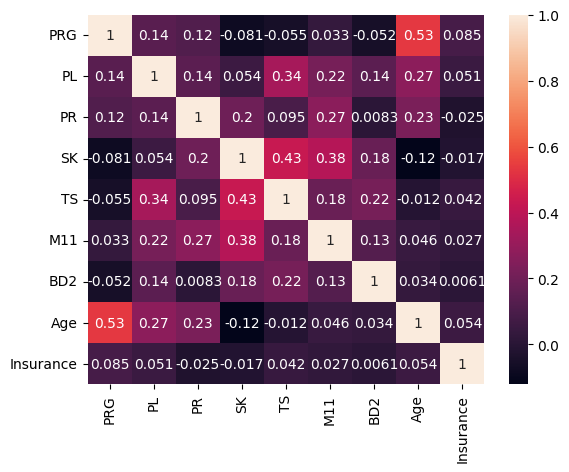

In [14]:
# Visualize the correlation with a heatmap

sns.heatmap(train[train_num].corr(), annot=True)

# Save the chart as an image file
plt.savefig('Images/Correlation of the numerical columns of the train dataset.png')

In [15]:
# Evaluate the numerical values on the test dataset.

test[test_num].describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [16]:
# Evaluate the correlation of the numerical values on the test dataset.

test[test_num].corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.088808,0.226032,-0.084315,-0.143327,-0.042980,0.041405,0.587779,0.000742
PL,0.088808,1.000000,0.184448,0.070199,0.296815,0.240396,0.119497,0.224456,-0.040125
PR,0.226032,0.184448,1.000000,0.243956,0.064700,0.327511,0.179641,0.292158,-0.134804
SK,-0.084315,0.070199,0.243956,1.000000,0.466503,0.450529,0.214038,-0.086018,-0.023332
TS,-0.143327,0.296815,0.064700,0.466503,1.000000,0.250437,0.051053,-0.159589,-0.114407
M11,-0.042980,0.240396,0.327511,0.450529,0.250437,1.000000,0.201224,-0.001741,-0.001815
BD2,0.041405,0.119497,0.179641,0.214038,0.051053,0.201224,1.000000,0.031738,0.094673
Age,0.587779,0.224456,0.292158,-0.086018,-0.159589,-0.001741,0.031738,1.000000,-0.013863
Insurance,0.000742,-0.040125,-0.134804,-0.023332,-0.114407,-0.001815,0.094673,-0.013863,1.000000


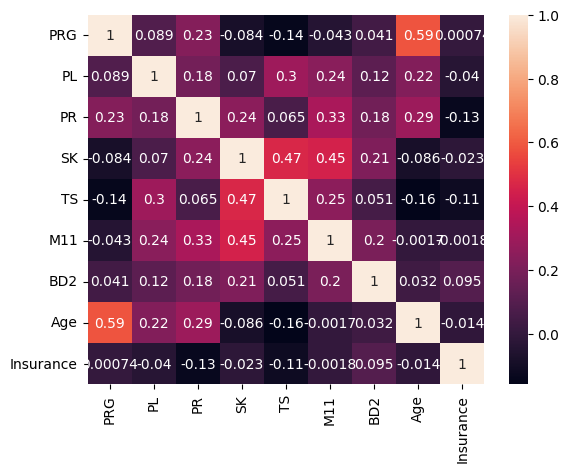

In [17]:
# Visualize the correlation with a heatmap

sns.heatmap(test[test_num].corr(), annot=True)

# Save the chart as an image file
plt.savefig('Images/Correlation of the numerical columns of the test dataset.png')

### Answering Analytical Questions

1. How many patients on the train dataset have developed sepsis?.

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64


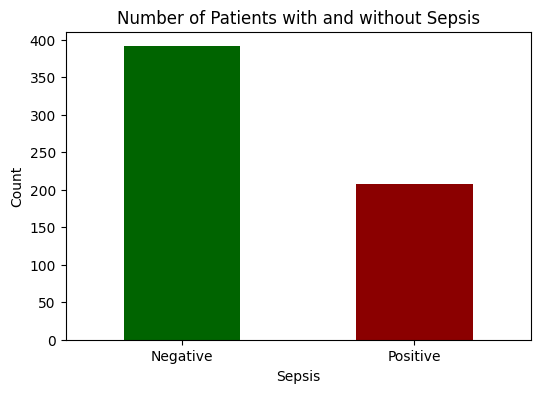

In [18]:
# Count the number of patients with and without sepsis on the train dataset
sepsis_count = train['Sepsis'].value_counts()
print(sepsis_count)

# Create a bar chart
plt.figure(figsize=(6, 4))
sepsis_count.plot(kind='bar', color=['darkgreen', 'darkred'])
plt.title('Number of Patients with and without Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

2. Which age group has more occurrence of sepsis?

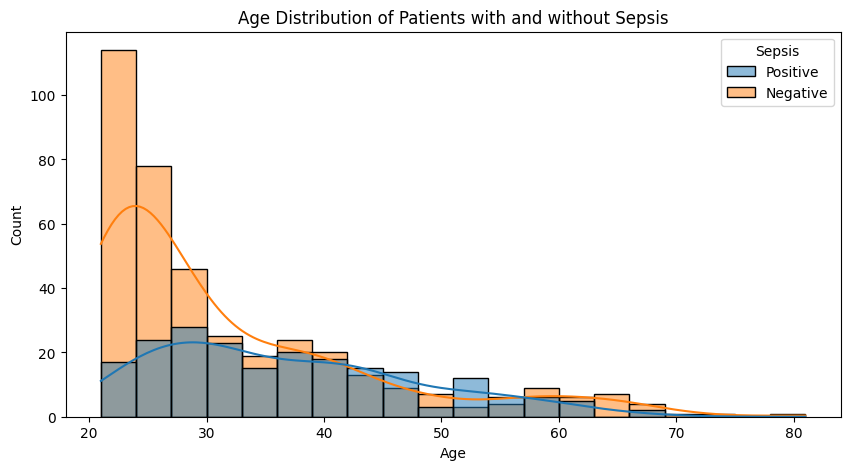

In [19]:
# Create a histogram of age distribution for sepsis-positive and sepsis-negative patients

plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='Age', hue='Sepsis', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Sepsis')
plt.show()

Does having health insurance reduce the chances of patients developing sepsis?

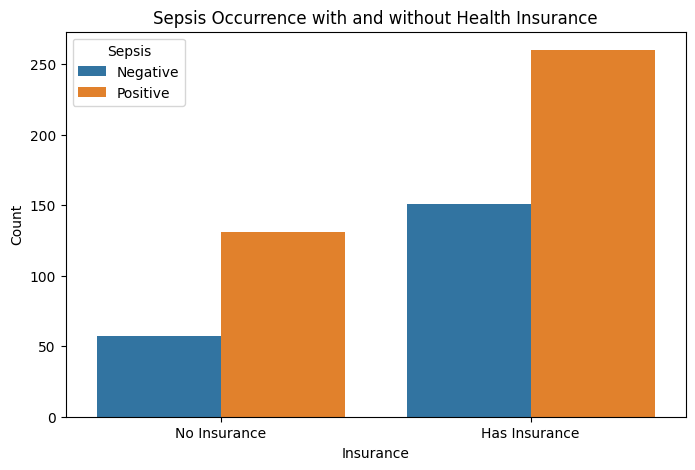

In [20]:
# Create a countplot to compare sepsis occurrence with and without insurance

plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Insurance', hue='Sepsis')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Sepsis Occurrence with and without Health Insurance')
plt.xticks([0, 1], ['No Insurance', 'Has Insurance'])
plt.legend(title='Sepsis', labels=['Negative', 'Positive'])
plt.show()

4. Does Body Mass Index (BMI) have a direct correlation with sepsis development?

### Feature Engineering

In [40]:
# Create a copy of the train and test datasets on which to carry out the feature engineering processes

train_data = train.copy()
test_data = test.copy()

In [41]:
# Drop the 'ID' column as it is not needed in modelling

train_data.drop(columns='ID', inplace=True)
test_data.drop(columns='ID', inplace=True)
train_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


In [43]:
# Replace positive with 1 and negative with 0 in the 'Sepsis' column of the train dataset

train_data['Sepsis'] = train_data['Sepsis'].replace(['Positive', 'Negative'], [1, 0])
train_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [50]:
# Obtain the X and y variables of the train dataset
X = train_data.drop('Sepsis', axis=1)
y = train_data['Sepsis']

# Split train dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the train dataset
print("Train set shape:", X_train.shape, y_train.shape, X_val.shape, y_val.shape)

Train set shape: (479, 9) (479,) (120, 9) (120,)


# Balancing the X_train of the unscaled dataset

In [67]:
# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_unscal_balanced, y_train_unscal_balanced = smote.fit_resample(X_train, y_train)

# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_unscal_balanced, y_train_unscal_balanced = rus.fit_resample(X_train, y_train)

# Print the class distribution before and after balancing
print("Before balancing:")
print(y_train.value_counts())

print("After balancing:")
print(pd.Series(y_train_balanced).value_counts())

Before balancing:
Sepsis
0    313
1    166
Name: count, dtype: int64
After balancing:
Sepsis
0    166
1    166
Name: count, dtype: int64


### Feature Scaling

In [44]:
# Create a scaler object using StandardScaler

scaler = StandardScaler()

In [45]:
# Use StandardScaler to scale the X_train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=scaler.get_feature_names_out())

# View the scaled X_train DataFrame
X_train_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503


In [46]:
# Use StandardScaler to scale the X_val
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=scaler.get_feature_names_out())

# View the scaled X_val DataFrame
X_val_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.176064,-1.014787,-0.620089,-0.563592,-0.262580,-0.755931,-0.613799,-0.879230,0.66767
1,1.560459,0.939121,0.807943,0.450277,0.395635,0.228939,2.887835,0.746465,0.66767
2,-1.044326,-0.641246,-0.416085,-1.219625,-0.614498,-1.056575,-0.351746,-0.635376,0.66767
3,-0.465485,0.651781,0.297932,0.867753,0.649798,0.633254,-0.378331,-0.310237,0.66767
4,-1.044326,-0.267704,0.501936,0.808113,1.242844,1.255277,-0.993586,-0.472806,0.66767


In [49]:
# Use StandardScaler to scale the test dataset
test_data_scaled = scaler.fit_transform(test_data)
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=scaler.get_feature_names_out())

# View the scaled test DataFrame
test_data_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.859927,-0.497755,-1.674099,-0.155474,0.353284,-1.232644,-0.104160,-0.613614,0.611542
1,-0.859927,-0.532034,0.907313,-0.091854,-0.733744,-0.693766,-0.127034,-0.787317,0.611542
2,0.613984,-0.943381,-3.635972,-1.300640,-0.733744,-1.151812,-0.813250,-0.439911,0.611542
3,-0.859927,0.016430,0.184518,0.989691,-0.733744,-0.599462,-1.107343,-0.266208,0.611542
4,0.908767,0.907682,0.391030,0.544349,0.407635,0.397463,0.827133,1.818231,-1.635210


### Balancing X_train of the scaled dataset

In [51]:
# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled_df, y_train)

# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_scaled_df, y_train)

# Print the class distribution before and after balancing
print("Before balancing:")
print(y_train.value_counts())

print("After balancing:")
print(pd.Series(y_train_balanced).value_counts())

Before balancing:
Sepsis
0    313
1    166
Name: count, dtype: int64
After balancing:
Sepsis
0    166
1    166
Name: count, dtype: int64


### Modelling

In [52]:
# Create a list of models to train and evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Adaptive Boosting', AdaBoostClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

### Model training with unscaled and unbalanced dataset

In [58]:
# Create an empty dictionary to store the performance metrics of the models after training with unscaled dataset
unscal_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with unscaled dataset
    model.fit(X_train, y_train)
    
    # Using the models to make predictions on the validation set
    y_pred_unscal = model.predict(X_val)
    
    # Calculate the performance metrics of the models on the unscaled dataset
    accuracy = accuracy_score(y_val, y_pred_unscal)
    precision = precision_score(y_val, y_pred_unscal)
    recall = recall_score(y_val, y_pred_unscal)
    f1 = f1_score(y_val, y_pred_unscal)
    roc_auc = roc_auc_score(y_val, y_pred_unscal)
    
    # Store the performance metrics results
    unscal_performance_metrics[model_name] = {
        'Unscal Accuracy': accuracy,
        'Unscal Precision': precision,
        'Unscal Recall': recall,
        'Unscal F1 Score': f1,
        'Unscal ROC_AUC': roc_auc
    }

In [59]:
# Create a DataFrame to store the performance metrics of the models on the unscaled dataset
unscaled_performance_metrics = pd.DataFrame(unscal_performance_metrics).transpose()
    
# Arrange the performance metrics DataFrame in descending order according to the F1 Score
unscaled_performance_metrics = unscaled_performance_metrics.sort_values('Unscal F1 Score', ascending=False)

# Show the performance metrics DataFrame of the models on the unbalanced dataset
unscaled_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Unscaled Dataset')

,Unscal Accuracy,Unscal Precision,Unscal Recall,Unscal F1 Score,Unscal ROC_AUC
Adaptive Boosting,0.775000,0.714286,0.595238,0.649351,0.733516
Logistic Regression,0.750000,0.650000,0.619048,0.634146,0.719780
Decision Tree,0.725000,0.609756,0.595238,0.602410,0.695055
Random Forest,0.708333,0.585366,0.571429,0.578313,0.676740
Gaussian Naive Bayes,0.691667,0.555556,0.595238,0.574713,0.669414
Gradient Boosting,0.725000,0.628571,0.523810,0.571429,0.678571
Support Vector Machine,0.716667,0.611111,0.523810,0.564103,0.672161
K-Nearest Neighbors,0.683333,0.545455,0.571429,0.558140,0.657509


Based on the f1 score of the models, Adaptive Boosting is the best model for the unbalanced dataset with an f1 score of 0.649351. Generally, Adaptive Boosting performed better in all the metrics except in the Recall.

### Confusion matrix for unscaled and unbalanced dataset

Confusion Matrix For Logistic Regression On UnScaled Dataset:
[[60 18]
 [16 26]]


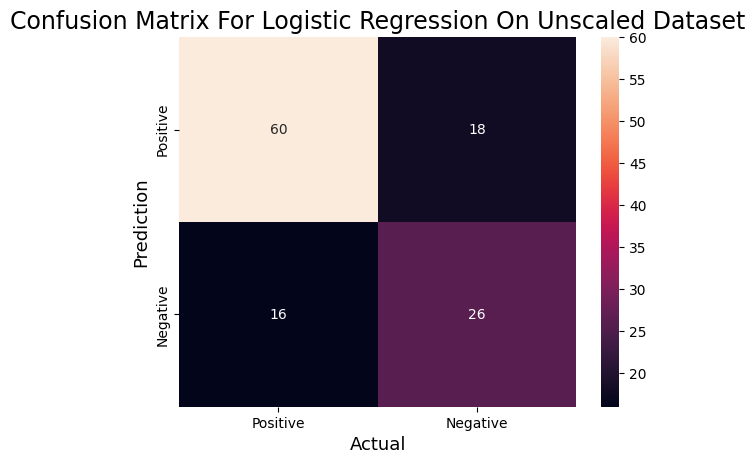

Confusion Matrix For Decision Tree On UnScaled Dataset:
[[60 18]
 [16 26]]


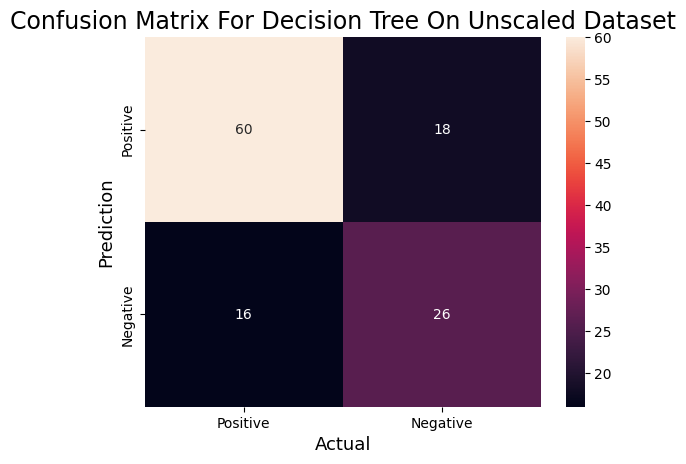

Confusion Matrix For Random Forest On UnScaled Dataset:
[[60 18]
 [16 26]]


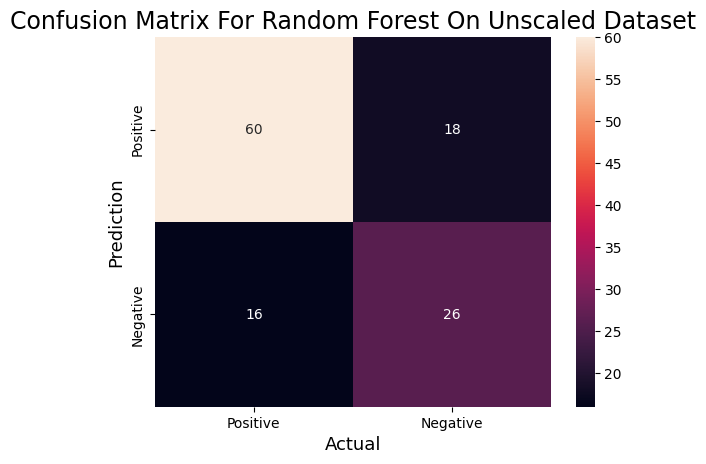

Confusion Matrix For Gradient Boosting On UnScaled Dataset:
[[60 18]
 [16 26]]


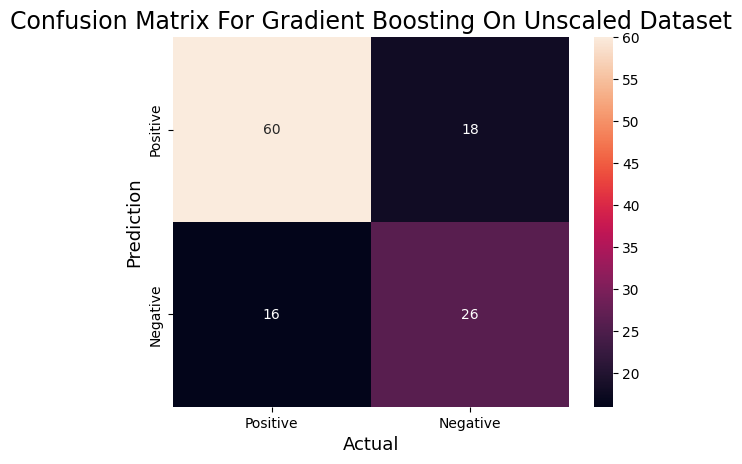

Confusion Matrix For Adaptive Boosting On UnScaled Dataset:
[[60 18]
 [16 26]]


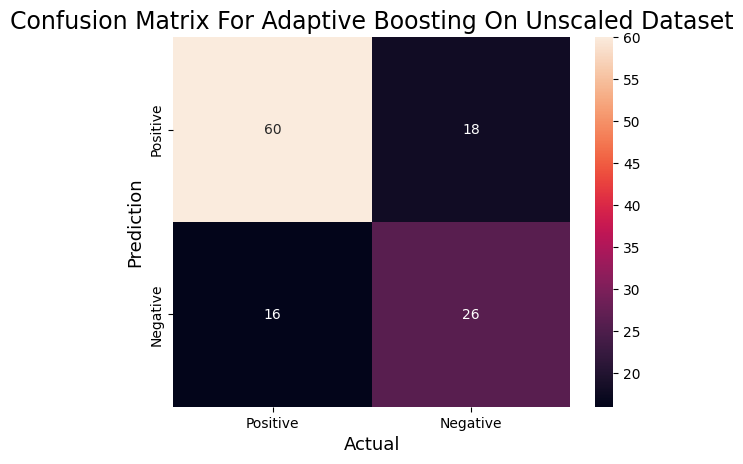

Confusion Matrix For Support Vector Machine On UnScaled Dataset:
[[60 18]
 [16 26]]


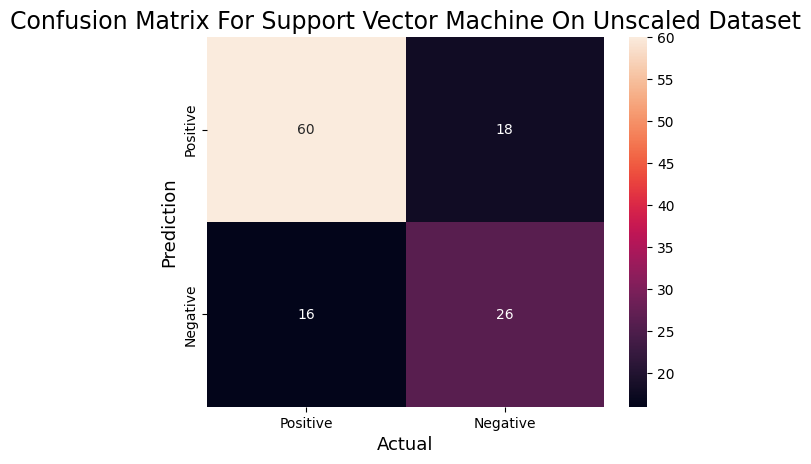

Confusion Matrix For Gaussian Naive Bayes On UnScaled Dataset:
[[60 18]
 [16 26]]


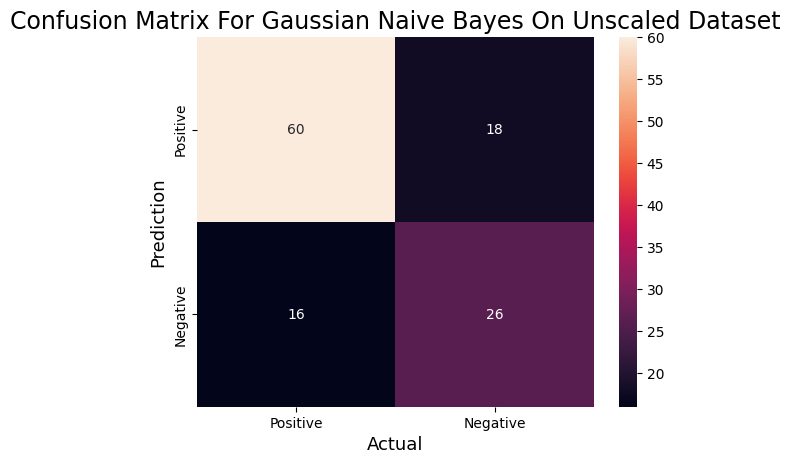

Confusion Matrix For K-Nearest Neighbors On UnScaled Dataset:
[[60 18]
 [16 26]]


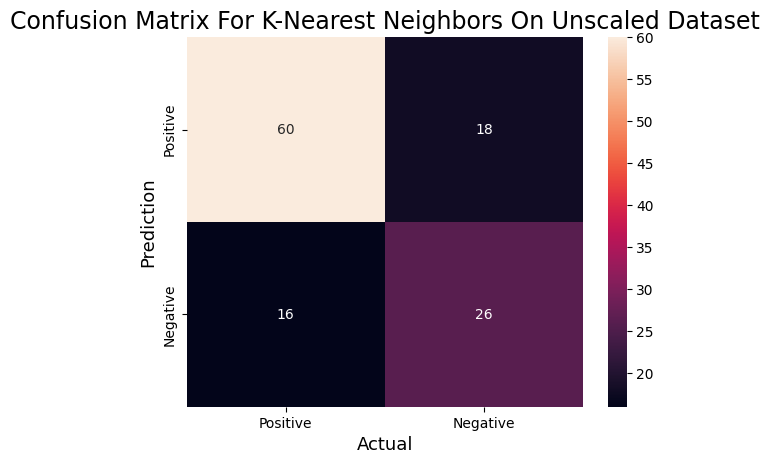

In [60]:
# Model prediction and confusion matrix computation
for model_name, model in models:
    # Model training with unscaled dataset
    model.fit(X_train, y_train)
    
    # Using the models to make predictions on the validation set
    y_pred_unscal = model.predict(X_val)

    # Compute the confusion matrix
    cm = confusion_matrix(y_val, y_pred_unbal)
    
    # Print the confusion matrix
    print(f'Confusion Matrix For {model_name} On UnScaled Dataset:\n{cm}')
    
    # plot the confusion matrix
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title(f'Confusion Matrix For {model_name} On Unscaled Dataset',fontsize=17)
    plt.show()

### Model training and evaluation with unscaled and balanced

In [69]:
# Create an empty dictionary to store the performance metrics of the models after training with unscaled dataset
unscal_balanced_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with unscaled dataset
    model.fit(X_train_unscal_balanced, y_train_unscal_balanced)
    
    # Using the models to make predictions on the validation set
    y_pred_unscal_balanced = model.predict(X_val)
    
    # Calculate the performance metrics of the models on the unscaled dataset
    accuracy = accuracy_score(y_val, y_pred_unscal_balanced)
    precision = precision_score(y_val, y_pred_unscal_balanced)
    recall = recall_score(y_val, y_pred_unscal_balanced)
    f1 = f1_score(y_val, y_pred_unscal_balanced)
    roc_auc = roc_auc_score(y_val, y_pred_unscal_balanced)
    
    # Store the performance metrics results
    unscal_balanced_performance_metrics[model_name] = {
        'Unscal_bal Accuracy': accuracy,
        'Unscal_bal Precision': precision,
        'Unscal_bal Recall': recall,
        'Unscal_bal F1 Score': f1,
        'Unscal_bal ROC_AUC': roc_auc
    }

In [70]:
# Create a DataFrame to store the performance metrics of the models on the unscaled balanced dataset
unscal_balanced_performance_metrics = pd.DataFrame(unscal_balanced_performance_metrics).transpose()
    
# Arrange the performance metrics DataFrame in descending order according to the F1 Score
unscal_balanced_performance_metrics = unscal_balanced_performance_metrics.sort_values('Unscal_bal F1 Score', ascending=False)

# Show the performance metrics DataFrame of the models on the unbalanced dataset
unscal_balanced_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Unscaled and Balanced Dataset')

,Unscal_bal Accuracy,Unscal_bal Precision,Unscal_bal Recall,Unscal_bal F1 Score,Unscal_bal ROC_AUC
Adaptive Boosting,0.750000,0.611111,0.785714,0.687500,0.758242
Gradient Boosting,0.733333,0.596154,0.738095,0.659574,0.734432
Random Forest,0.725000,0.588235,0.714286,0.645161,0.722527
Logistic Regression,0.716667,0.580000,0.690476,0.630435,0.710623
Support Vector Machine,0.683333,0.537037,0.690476,0.604167,0.684982
Gaussian Naive Bayes,0.683333,0.538462,0.666667,0.595745,0.679487
K-Nearest Neighbors,0.616667,0.468750,0.714286,0.566038,0.639194
Decision Tree,0.650000,0.500000,0.642857,0.562500,0.648352


In [ ]:
# Model prediction and confusion matrix computation
for model_name, model in models:
    # Model training with unscaled dataset
    model.fit(X_train, y_train)
    
    # Using the models to make predictions on the validation set
    y_pred_unscal = model.predict(X_val)

    # Compute the confusion matrix
    cm = confusion_matrix(y_val, y_pred_unbal)
    
    # Print the confusion matrix
    print(f'Confusion Matrix For {model_name} On UnScaled Dataset:\n{cm}')
    
    # plot the confusion matrix
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title(f'Confusion Matrix For {model_name} On Unscaled Dataset',fontsize=17)
    plt.show()

### Model training and evaluation with scaled and unbalanced dataset

In [61]:
# Create an empty dictionary to store the performance metrics of the models after training with unbalanced dataset
unbal_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with unbalanced dataset
    model.fit(X_train_scaled_df, y_train)
    
    # Using the models to make predictions on the validation set
    y_pred_unbal = model.predict(X_val_scaled_df)
    
    # Calculate the performance metrics of the models on the balanced dataset
    accuracy = accuracy_score(y_val, y_pred_unbal)
    precision = precision_score(y_val, y_pred_unbal)
    recall = recall_score(y_val, y_pred_unbal)
    f1 = f1_score(y_val, y_pred_unbal)
    roc_auc = roc_auc_score(y_val, y_pred_unbal)
    
    # Store the performance metrics results
    unbal_performance_metrics[model_name] = {
        'Unbal Accuracy': accuracy,
        'Unbal Precision': precision,
        'Unbal Recall': recall,
        'Unbal F1 Score': f1,
        'Unbal ROC_AUC': roc_auc
    }

In [62]:
# Create a DataFrame to store the performance metrics of the models on the unbalanced dataset
unbalanced_performance_metrics = pd.DataFrame(unbal_performance_metrics).transpose()
    
# Arrange the performance metrics DataFrame in descending order according to the F1 Score
unbalanced_performance_metrics = unbalanced_performance_metrics.sort_values('Unbal F1 Score', ascending=False)

# Show the performance metrics DataFrame of the models on the unbalanced dataset
unbalanced_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Unbalanced Dataset')

,Unbal Accuracy,Unbal Precision,Unbal Recall,Unbal F1 Score,Unbal ROC_AUC
Logistic Regression,0.733333,0.625000,0.595238,0.609756,0.701465
K-Nearest Neighbors,0.716667,0.590909,0.619048,0.604651,0.694139
Gradient Boosting,0.733333,0.638889,0.547619,0.589744,0.690476
Random Forest,0.733333,0.647059,0.523810,0.578947,0.684982
Decision Tree,0.683333,0.541667,0.619048,0.577778,0.668498
Adaptive Boosting,0.716667,0.611111,0.523810,0.564103,0.672161
Gaussian Naive Bayes,0.716667,0.611111,0.523810,0.564103,0.672161
Support Vector Machine,0.700000,0.588235,0.476190,0.526316,0.648352


Based on the f1 score of the models, Logistic Regression is the best model for the unbalanced dataset with an f1 score of 0.609756. Generally, Adaptive Boosting performed better in all the metrics except in the Precision and Recall.

### Confusion matrix for scaled and unbalanced dataset

Confusion Matrix For Logistic Regression On Unbalanced Dataset:
[[63 15]
 [17 25]]


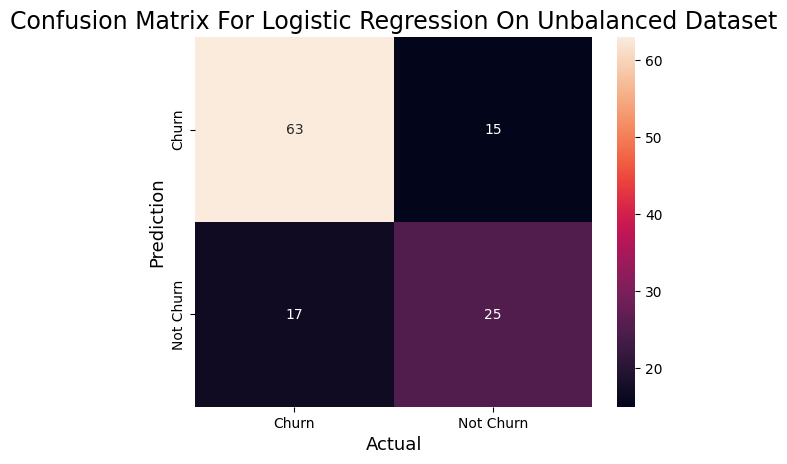

Confusion Matrix For Decision Tree On Unbalanced Dataset:
[[56 22]
 [16 26]]


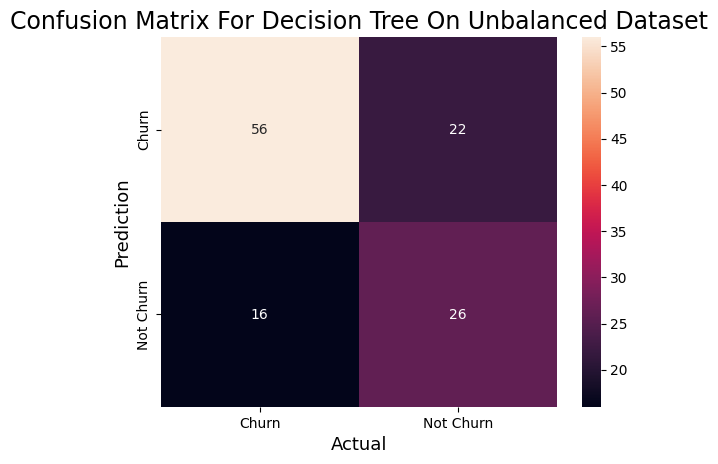

Confusion Matrix For Random Forest On Unbalanced Dataset:
[[66 12]
 [20 22]]


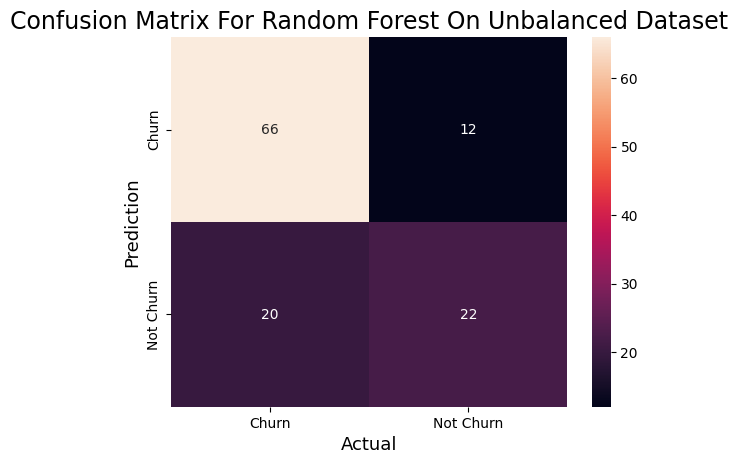

Confusion Matrix For Gradient Boosting On Unbalanced Dataset:
[[65 13]
 [19 23]]


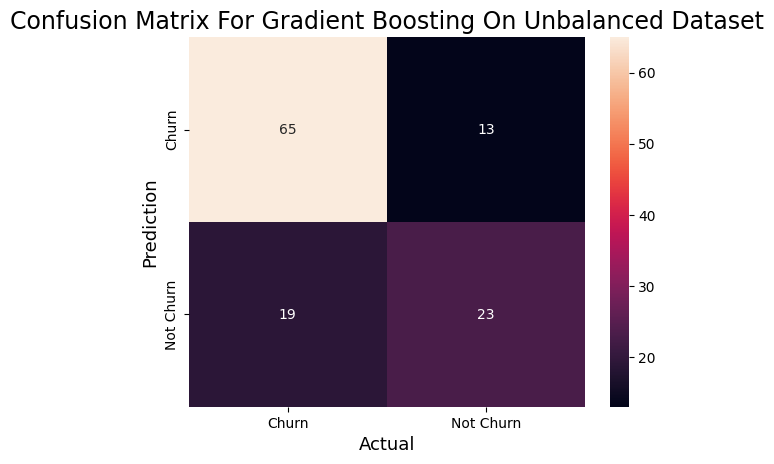

Confusion Matrix For Adaptive Boosting On Unbalanced Dataset:
[[64 14]
 [20 22]]


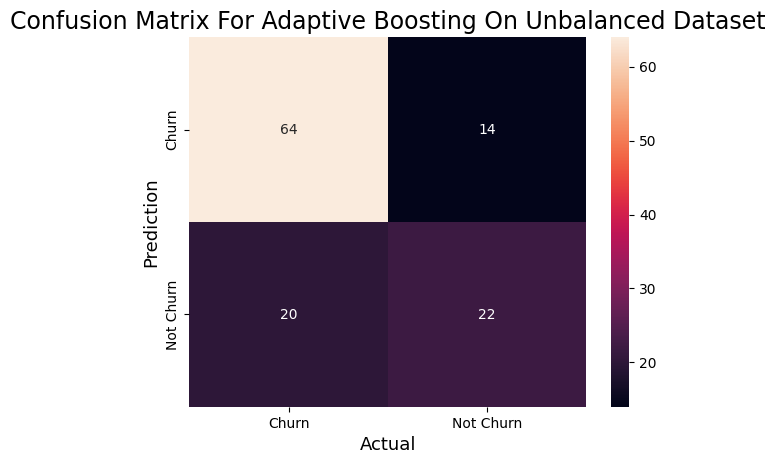

Confusion Matrix For Support Vector Machine On Unbalanced Dataset:
[[64 14]
 [22 20]]


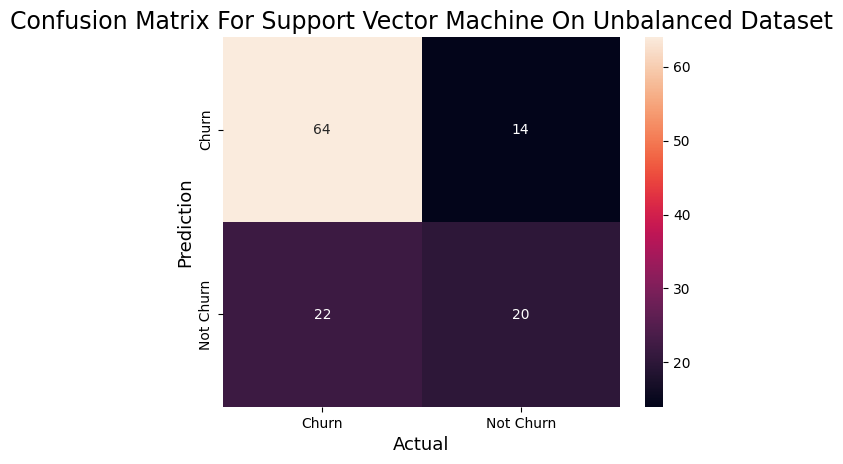

Confusion Matrix For Gaussian Naive Bayes On Unbalanced Dataset:
[[64 14]
 [20 22]]


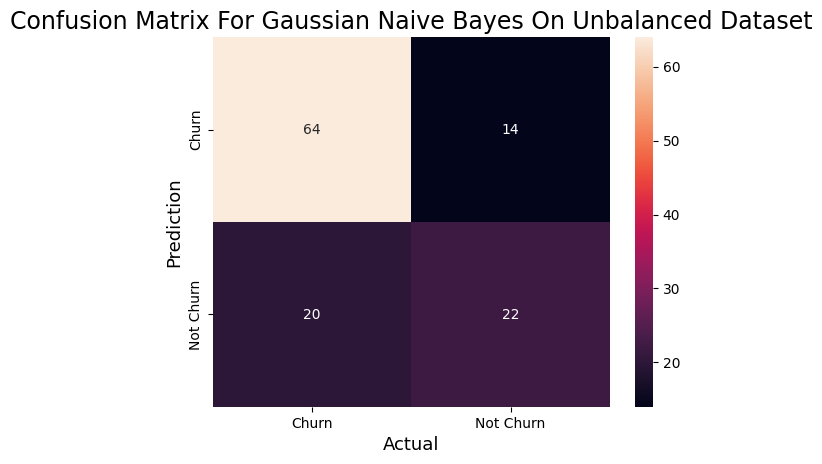

Confusion Matrix For K-Nearest Neighbors On Unbalanced Dataset:
[[60 18]
 [16 26]]


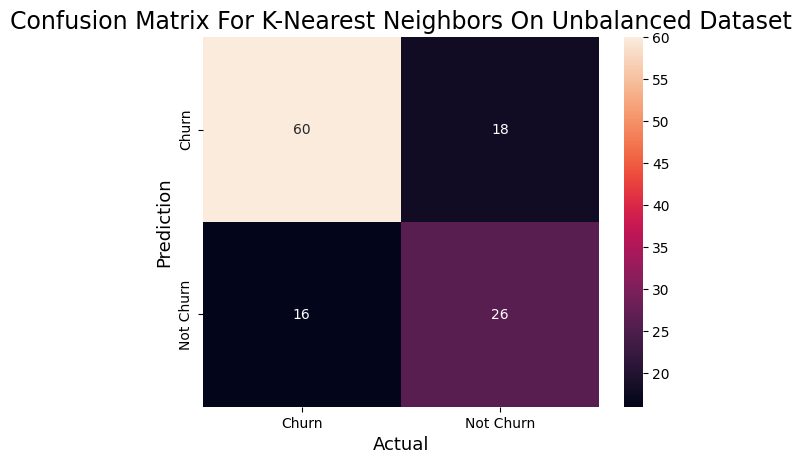

In [63]:
# Model prediction and confusion matrix computation
for model_name, model in models:
    # Model training with unbalanced dataset
    model.fit(X_train_scaled_df, y_train)
    
    # Using the models to make predictions on the validation set
    y_pred_unbal = model.predict(X_val_scaled_df)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_val, y_pred_unbal)
    
    # Print the confusion matrix
    print(f'Confusion Matrix For {model_name} On Unbalanced Dataset:\n{cm}')
    
    # plot the confusion matrix
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Churn','Not Churn'],
            yticklabels=['Churn','Not Churn'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title(f'Confusion Matrix For {model_name} On Unbalanced Dataset',fontsize=17)
    plt.show()

### Model training and evaluation with scaled and balanced dataset

In [65]:
# Create an empty dictionary to store the performance metrics of the models after training with balanced dataset

bal_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with balanced dataset
    model.fit(X_train_balanced, y_train_balanced)
    
    # Using the models to make predictions on the validation set
    y_pred_bal = model.predict(X_val_scaled_df)
    
    # Calculate the performance metrics of the models on the balanced dataset
    accuracy = accuracy_score(y_val, y_pred_bal)
    precision = precision_score(y_val, y_pred_bal)
    recall = recall_score(y_val, y_pred_bal)
    f1 = f1_score(y_val, y_pred_bal)
    roc_auc = roc_auc_score(y_val, y_pred_bal)
    
    # Store the performance metrics results
    bal_performance_metrics[model_name] = {
        'Bal Accuracy': accuracy,
        'Bal Precision': precision,
        'Bal Recall': recall,
        'Bal F1 Score': f1,
        'Bal ROC_AUC': roc_auc
    }

In [66]:
# Create a DataFrame to store the performance metrics of the models on the balanced dataset
balanced_performance_metrics = pd.DataFrame(bal_performance_metrics).transpose()
    
# Arrange the performance metrics DataFrame in descending order according to the F1 Score
balanced_performance_metrics = balanced_performance_metrics.sort_values('Bal F1 Score', ascending=False)

# Show the performance metrics DataFrame of the models on the balanced dataset
balanced_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Balanced Dataset')

,Bal Accuracy,Bal Precision,Bal Recall,Bal F1 Score,Bal ROC_AUC
Adaptive Boosting,0.758333,0.632653,0.738095,0.681319,0.753663
Gradient Boosting,0.733333,0.592593,0.761905,0.666667,0.739927
Logistic Regression,0.733333,0.600000,0.714286,0.652174,0.728938
Random Forest,0.733333,0.604167,0.690476,0.644444,0.723443
Decision Tree,0.708333,0.563636,0.738095,0.639175,0.715201
Gaussian Naive Bayes,0.716667,0.586957,0.642857,0.613636,0.699634
K-Nearest Neighbors,0.650000,0.500000,0.714286,0.588235,0.664835
Support Vector Machine,0.666667,0.519231,0.642857,0.574468,0.661172


Based on the f1 score of the models, Adaptive Boosting is the best model for the unbalanced dataset with an f1 score of 0.681319. Generally, Adaptive Boosting performed better in all the metrics except in the Recall.

### Hyper-parameter Tuning

### Evaluation

### Hypothesis Testing

### Conclusion

### Deployment